# Upstate NY Food Desert Choropleth Map

I wish to analyze the low income/low access data in the area known as the Capital Region of NY, inclusive of 14 counties in and around Albany, NY.

## This script contains the following points:
1. Import libraries
2. Import json NYS county mapping data
2. Import new_york2.csv dataset and assign to ny_county
3. Verify the dataset
4. Develop Choropleths of LILA Tracts, total population, total low income, and total SNAP in NYS counties


### 1. Importing Libraries

In [31]:
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import visualization libraries
import seaborn as sns
import matplotlib
import folium
import json

### 3. Import NYS county json data
NY State county data pulled from the Cornell University Geospatial Information Repository @ https://cugir.library.cornell.edu/catalog/cugir-007865

In [2]:
# Import ".json" file for NY state by county

nycounty_geo = r'C:\Users\howl6\OneDrive\Certificates\CareerFoundry\Coursework\Data_Immersion\Chapter 6\Food_Desert\02_Data\original_data\cugir-007865-geojson.json'

In [3]:
# reviewing the JSON list for keys

f = open(r"C:\Users\howl6\OneDrive\Certificates\CareerFoundry\Coursework\Data_Immersion\Chapter 6\Food_Desert\02_Data\original_data\cugir-007865-geojson.json",)
  
# returns JSON object as a dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'cugir007865.1', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-74.712396, 44.953008], [-74.711132, 44.953008], [-74.691251, 44.953], [-74.690671, 44.952909], [-74.689482, 44.9529], [-74.668382, 44.952777], [-74.667773, 44.95277], [-74.641872, 44.952621], [-74.636018, 44.910792], [-74.635172, 44.904471], [-74.63121, 44.875391], [-74.63048, 44.869393], [-74.629994, 44.865378], [-74.629519, 44.861096], [-74.629231, 44.859404], [-74.628731, 44.857004], [-74.628559, 44.856249], [-74.626236, 44.838506], [-74.625049, 44.830346], [-74.62294, 44.815154], [-74.622615, 44.812766], [-74.622537, 44.812195], [-74.621928, 44.807683], [-74.619921, 44.792855], [-74.617402, 44.774552], [-74.614223, 44.752374], [-74.613318, 44.74575], [-74.610841, 44.72708], [-74.607362, 44.703708], [-74.604547, 44.686315], [-74.602938, 44.67662], [-74.589474, 44.598732], [-74.571215, 44.470241], [-74.570132, 44.463396], [-74.55863, 44.385142], [-74.557046, 44.372935], [-74.5535, 44.3

### 2. Importing NY State dataset

In [4]:
path = r'C:\Users\howl6\OneDrive\Certificates\CareerFoundry\Coursework\Data_Immersion\Chapter 6\Food_Desert'

In [8]:
ny_county = pd.read_csv(os.path.join(path, '02_Data', 'cleaned_data', 'new_york2.csv'), index_col=False)

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### 4. Verify the dataset

In [9]:
ny_county.head()

Unnamed: 0        Tract  County  Urban  Total_Population  Housing_Units  \
0           0  36001000100  Albany      1              2139            784   
1           1  36001000200  Albany      1              6046           2514   
2           2  36001000300  Albany      1              5888           2581   
3           3  36001000401  Albany      1              2227           1017   
4           4  36001000403  Albany      1              4415           2196   

   High_Share_Group  Total_Group_Quarters  Percent_Group_Quarters  \
0                 0                  79.0                    3.69   
1                 0                  84.0                    1.39   
2                 0                 193.0                    3.28   
3                 0                 575.0                   25.82   
4                 0                  15.0                    0.34   

   LILATracts_1And10  LILATracts_halfAnd10  LILATracts_1And20  \
0                  1                     1                  1   
1                  1                     1                  1   
2                  1                     1                  1   
3                  0                     0                  0   
4                  0                     0                  0   

   LILATracts_Vehicle  HUNVFlag  Low_Income_Flag  Total_Poverty_Rate  \
0                   1         1                1                32.5   
1                   1         1                1                34.4   
2                   1         1                1                27.0   
3                   0         1                0                 7.7   
4                   0         1                0                12.3   

   MedianFamilyIncome  LA1and10  LAhalfand10  LA1and20  LATracts_half  \
0             45515.0         1            1         1              1   
1             39545.0         1            1         1              1   
2             45384.0         1            1         1              1   
3             99514.0         1            1         1              1   
4            115391.0         0            1         0              1   

   LATracts1  LATracts10  LATracts20  LATractsVehicle_20  LAPOP1_10  \
0          1           0           0                   1     2139.0   
1          1           0           0                   1     2981.0   
2          1           0           0                   1     1151.0   
3          1           0           0                   1      505.0   
4          0           0           0                   1      371.0   

   LAPOP05_10  LAPOP1_20  LALOWI1_10  LALOWI05_10  LALOWI1_20  lapophalf  \
0      2139.0     2139.0      1246.0       1246.0      1246.0     2139.0   
1      5948.0     2981.0      2042.0       3389.0      2042.0     5948.0   
2      2847.0     1151.0       189.0       1013.0       189.0     2847.0   
3      1522.0      505.0       111.0        334.0       111.0     1522.0   
4      1429.0      371.0        87.0        259.0        87.0     1429.0   

   lapophalfshare  lalowihalf  lalowihalfshare  lakidshalf  lakidshalfshare  \
0          100.00      1246.0            58.26       644.0            30.11   
1           98.38      3389.0            56.05      1917.0            31.71   
2           48.36      1013.0            17.20       496.0             8.42   
3           68.35       334.0            15.00       111.0             5.00   
4           32.36       259.0             5.86       175.0             3.96   

   laseniorshalf  laseniorshalfshare  lawhitehalf  lawhitehalfshare  \
0          218.0               10.19        506.0             23.66   
1          398.0                6.58        815.0             13.47   
2          583.0                9.89       1731.0             29.40   
3          556.0               24.94       1300.0             58.38   
4          233.0                5.27       1180.0             26.73   

   lablackhalf  lablackhalfshare  laasianhalf  laasianhalfshare  lanho

In [10]:
ny_county.tail()

Unnamed: 0        Tract County  Urban  Total_Population  Housing_Units  \
4865        4865  36123150100  Yates      0              5942           2200   
4866        4866  36123150200  Yates      0              5561           2138   
4867        4867  36123150300  Yates      0              5348           2074   
4868        4868  36123150400  Yates      0              3973           1369   
4869        4869  36123150500  Yates      0              4524           1736   

      High_Share_Group  Total_Group_Quarters  Percent_Group_Quarters  \
4865                 0                 134.0                    2.26   
4866                 0                 287.0                    5.16   
4867                 0                  38.0                    0.71   
4868                 0                 828.0                   20.84   
4869                 0                   0.0                    0.00   

      LILATracts_1And10  LILATracts_halfAnd10  LILATracts_1And20  \
4865                  0                     0                  0   
4866                  0                     0                  0   
4867                  0                     0                  0   
4868                  0                     0                  0   
4869                  0                     0                  0   

      LILATracts_Vehicle  HUNVFlag  Low_Income_Flag  Total_Poverty_Rate  \
4865                   1         1                1                12.0   
4866                   0         1                0                11.3   
4867                   0         1                0                12.9   
4868                   0         0                0                 4.3   
4869                   0         1                0                13.6   

      MedianFamilyIncome  LA1and10  LAhalfand10  LA1and20  LATracts_half  \
4865             64202.0         0            0         0              0   
4866             77228.0         0            0         0              0   
4867             66369.0         0            0         0              0   
4868             85511.0         0            0         0              0   
4869             66250.0         0            0         0              0   

      LATracts1  LATracts10  LATracts20  LATractsVehicle_20  LAPOP1_10  \
4865          0           0           0                   1        NaN   
4866          0           0           0                   1        NaN   
4867          0           0           0                   1      151.0   
4868          0           0           0                   0        NaN   
4869          0           0           0                   1        NaN   

      LAPOP05_10  LAPOP1_20  LALOWI1_10  LALOWI05_10  LALOWI1_20  lapophalf  \
4865         NaN        NaN         NaN          NaN         NaN     4590.0   
4866         NaN        NaN         NaN          NaN         NaN     3297.0   
4867       151.0        NaN        45.0         45.0         NaN     5348.0   
4868         NaN        NaN         NaN          NaN         NaN     3168.0   
4869         NaN        NaN         NaN          NaN         NaN     3382.0   

      lapophalfshare  lalowihalf  lalowihalfshare  lakidshalf  \
4865           77.25      1750.0            29.44      1265.0   
4866           59.28      1036.0            18.64       972.0   
4867          100.00      1900.0            35.53      1307.0   
4868           79.75       254.0             6.39       406.0   
4869           74.75      1089.0            24.08       919.0   

      lakidshalfshare  laseniorshalf  laseniorshalfshare  lawhitehalf  \
4865            21.29          790.0               13.29       4463.0   
4866            17.49          621.0               11.17       3228.0   
4867            24.44          747.0               13.97       5248.0   
4868            10.22          511.0               12.85       3046.0   
4869            20.30          611.0               13.52       3326.0   

      lawhitehalfshare  l

In [11]:
ny_county.shape

(4870, 148)

In [12]:
ny_county.columns

Index(['Unnamed: 0', 'Tract', 'County', 'Urban', 'Total_Population',
       'Housing_Units', 'High_Share_Group', 'Total_Group_Quarters',
       'Percent_Group_Quarters', 'LILATracts_1And10',
       ...
       'Total_White', 'Total_Black', 'Total_Asian', 'Total_NHOPI',
       'Total_AIAN', 'Total_OMulti', 'Total_Hispanic', 'Total_No_Vehicle',
       'Total_SNAP', 'Population_Size'],
      dtype='object', length=148)

In [13]:
ny_county2 = ny_county.drop(columns = ['Unnamed: 0'])

In [14]:
ny_county2.dtypes

Tract                       int64
County                     object
Urban                       int64
Total_Population            int64
Housing_Units               int64
High_Share_Group            int64
Total_Group_Quarters      float64
Percent_Group_Quarters    float64
LILATracts_1And10           int64
LILATracts_halfAnd10        int64
LILATracts_1And20           int64
LILATracts_Vehicle          int64
HUNVFlag                    int64
Low_Income_Flag             int64
Total_Poverty_Rate        float64
MedianFamilyIncome        float64
LA1and10                    int64
LAhalfand10                 int64
LA1and20                    int64
LATracts_half               int64
LATracts1                   int64
LATracts10                  int64
LATracts20                  int64
LATractsVehicle_20          int64
LAPOP1_10                 float64
LAPOP05_10                float64
LAPOP1_20                 float64
LALOWI1_10                float64
LALOWI05_10               float64
LALOWI1_20    

### 5. Develop Choropleths of LILA Tracts, total population, total low income, and total SNAP in NYS counties

### LILA tracts are Low-income(LI) census tracts where a significant number or share of residents is more than a specific distance,  urban or rural, from the nearest supermarket (LA).  Each census tract is represented with a 1 or 0, with 1 indicating the presence of one of the LILA categories below.

* LILATracts_1And10: 1 mile (urban) or 10 miles (rural);
* LILATracts_halfAnd10: 1/2 mile (urban) or 10 miles (rural);
* LILATracts_1And20:   1 mile (urban) or 20 miles (rural);
* LILATracts_Vehicle: have a vehicle and are more than 1/2 mile or a significant number or share of residents are more than 20 miles from the nearest supermarket.

### Total_Low_income is the total count of the low-income population.
Low Income Tracts have a poverty rate of 20% or higher, or a median family income less than 80% of median family income for the state or metropolitan area.

### Total_SNAP is the total count of housing units receiving SNAP (Supplemental Nutrition Assistance Program) benefits.


In [15]:
ny_county2['County'] = ny_county['County'].str.title()

In [16]:
# Choropleth of LILA Tracts 1 mi. and 10 mi.
data_to_plot = ny_county2[['County','LILATracts_1And10']]

In [17]:
map = folium.Map(location=[41, -74], zoom_start = 5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = nycounty_geo, 
    data = data_to_plot,
    columns = ['County','LILATracts_1And10'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "LILA 1 mi. and 10 mi., 0-absent, 1-present").add_to(map)
folium.LayerControl().add_to(map)

map

In [18]:
# Choropleth of LILA tracts 1/2 mi. and 10 mi.
data_to_plot = ny_county2[['County','LILATracts_halfAnd10']]

In [19]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[41, -74], zoom_start = 5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = nycounty_geo, 
    data = data_to_plot,
    columns = ['County','LILATracts_halfAnd10'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "LILA 1/2 mi. and 10mi., 0-absent, 1-present").add_to(map)
folium.LayerControl().add_to(map)

map

In [20]:
# Choropleth of LILA Tracts 1 mi. and 20 mi.
data_to_plot = ny_county2[['County','LILATracts_1And20']]

In [21]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[41, -74], zoom_start = 5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = nycounty_geo, 
    data = data_to_plot,
    columns = ['County','LILATracts_1And20'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "LILA 1mi. and 20mi., 0-absent, 1-present").add_to(map)
folium.LayerControl().add_to(map)

map

In [22]:
# Choropleth of LIlA Tracts_Vehicle
data_to_plot = ny_county2[['County','LILATracts_Vehicle']]

In [23]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[41, -74], zoom_start = 5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = nycounty_geo, 
    data = data_to_plot,
    columns = ['County','LILATracts_Vehicle'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "LILA Vehicle 0-absent, 1-present").add_to(map)
folium.LayerControl().add_to(map)

map

In [24]:
# Choropleth of LIlA Tracts_Vehicle
data_to_plot = ny_county2[['County','Total_Population']]

In [25]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[41, -74], zoom_start = 5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = nycounty_geo, 
    data = data_to_plot,
    columns = ['County','Total_Population'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Total Population").add_to(map)
folium.LayerControl().add_to(map)

map

In [26]:
# Choropleth of LIlA Tracts_Vehicle
data_to_plot = ny_county2[['County','Total_Low_Income']]

In [27]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[41, -74], zoom_start = 5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = nycounty_geo, 
    data = data_to_plot,
    columns = ['County','Total_Low_Income'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Total Low Income").add_to(map)
folium.LayerControl().add_to(map)

map

<AxesSubplot:xlabel='Total_SNAP', ylabel='Count'>

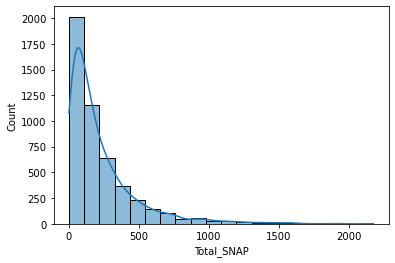

In [28]:
# Histogram of total SNAP benefits
sns.histplot(ny_county2['Total_SNAP'], bins=20, kde = True)

In [29]:
# Choropleth of SNAP benefits by county
data_to_plot = ny_county2[['County','Total_SNAP']]

In [30]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[41, -74], zoom_start = 5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = nycounty_geo, 
    data = data_to_plot,
    columns = ['County','Total_SNAP'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Total SNAP benefits").add_to(map)
folium.LayerControl().add_to(map)

map

### My initial questions to explore included identifying the relationship of access to food resources via census tract and if there are relationships to locations such as rural vs. urban, particularly in the upstate New York region; identifying if there is a relationship between population size and access to food resources; and highlighting areas where there are significant gaps in access to food resources.

The choropleths helped to visualize the locations of the various low income, low access tracts at the county level across NYS.  The choropleths suggest a relationship between population size, low income regions, regions with greater SNAP utilization, and access to grocery stores.  

I had been considering focusing on the counties in the Capital Region where I live.  However, the choropleths suggest that gaps are largely absent in this region, and highlight gaps further north, south and west of the Albany region.   As a result, I will be focusing attention on these regions.